# Lab 08 - Task

## Travelling on vacations to Romania

Suppose that you plan to spend your summer vacations in Romania. Following is the map of Romania.



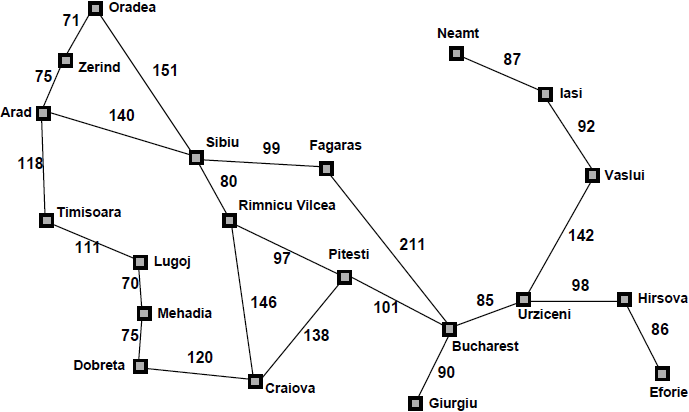

The map of Romania is represented as a graph, with cities as __nodes__ and roads as __edges__. You are given the starting city and the goal city. You need to write two functions, one using __BFS__ and one using __DFS__, to find a path between the starting city and the goal city.


__Your functions should take the following inputs:__

* G: A NetworkX graph object representing the map of Romania.
* start: The starting city.
* goal: The goal city.

Your functions should return a path (a list of cities) from the starting city to the goal city, or None if no such path exists.


### Import All the required libraries here 

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

### Generate graph for Map of Romania

Note: Complete the missing part of the code

In [21]:
G = nx.Graph()
nodes = ["Arad", "Bucharest","Zerind","Oradea","Timisoara","Lugoj","Mehadia","Dobreta","Craiova","Pitesti","Rimnicu Vilsea","Sibiu","Fagaras","Bucharest","Giurgiu","Urziceni","Neamt","lasi","Vasiui","Hirsova","Eforie"]
print(len(nodes))
G.add_nodes_from(nodes) #add remaining nodes to the list

21


 The Kamada-Kawai layout is a method for graph layout that aims to produce an aesthetically pleasing layout by minimizing the total energy of the graph. The layout is computed by treating the edges of the graph as springs and the nodes as charged particles, and then using an iterative algorithm to find the optimal positions of the nodes that balance the forces between them.

In [22]:
edges = [("Arad", "Zerind", 75),("Arad", "Sibiu", 140),         
         ("Arad", "Timisoara", 118),("Bucharest", "Fagaras", 211)
         ,("Zerind","Oradea",71),("Oradea","Sibiu",151),
         ("Sibiu","Fagaras",99),("Sibiu","Rimnicu Vilcea",80),
         ("Rimnicu Vilcea","Pitesti",97),("Rimnicu Vilcea","Craiova",146)
         ,("Pitesti","Bucharest",101),("Pitesti","Craiova",138)
         ,("Bucharest","Girgiu",90),("Bucharest","Urziceni",85)
         ,("Urziceni","Vasiui",142),("Urziceni","Hirsova",98)
         ,("Vasiui","Lasi",92)
         ,("Lasi","Neamt",87),("Hirsova","Eforie",86)
         ,("Dobreta","Craiova",120),("Dobreta","Mehadia",75)
         ,("Mehadia","Lugoj",70)
         ,("Timisoara","Lugoj",111)] #add remaining edges to the list
print(len(edges))
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

23


In [23]:
# Set node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)


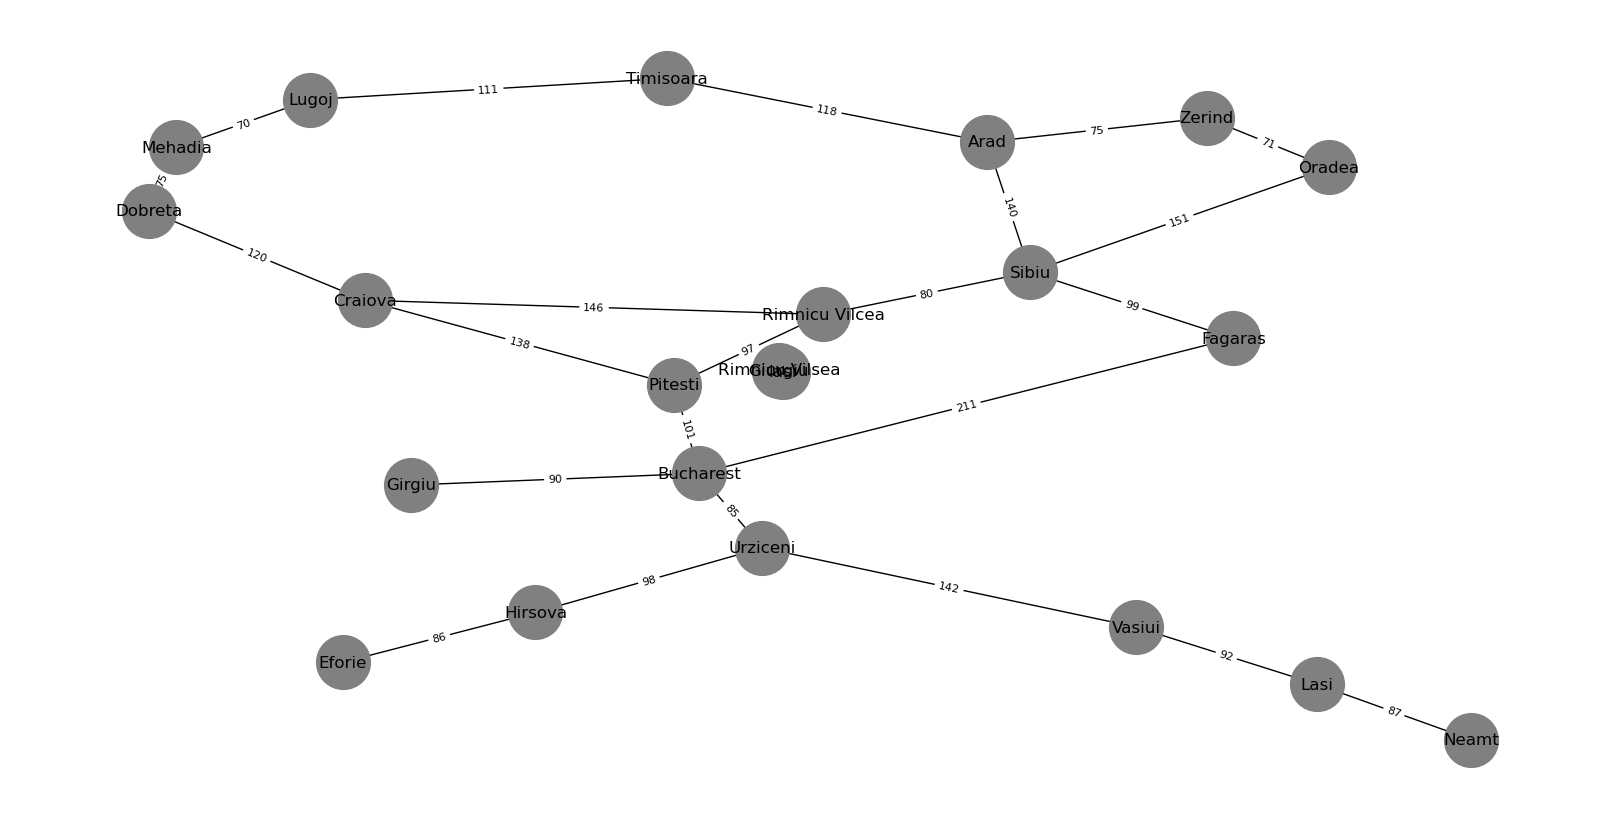

In [24]:
# Draw graph with labels and edge weights
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size= 1500, node_color ="grey")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

In [18]:
G["Lasi"]

AtlasView({'Vasiui': {'weight': 92}, 'Neamt': {'weight': 87}})

The __init__ method is the constructor for the Node class and takes three arguments: state, parent, and action.

* __state__ represents the state of the node, which is usually a position or a configuration in a search problem.
* __parent__ is a reference to the parent node in the search tree.
* __action__ is the action that was taken to get to the current node from its parent.

In [25]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

This code defines a class StackFrontier that represents a stack data structure for storing nodes in a search algorithm. It has the following methods:

* __\_\_init\_\___ Initializes an empty list to store nodes.
* __add(node):__ Adds a node to the top of the stack.
* __contains_state(state):__ Checks if the given state is present in any of the nodes in the stack.
* __empty():__ Returns True if the stack is empty, False otherwise.
* __remove():__ Removes and returns the top node from the stack. If the stack is empty, it raises an exception.

In [26]:
class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

QueueFrontier is a class that is derived from StackFrontier (using inheritance). It inherits all the attributes and methods of StackFrontier and can have additional attributes and methods or override existing ones.

The remove method in QueueFrontier is an override of the remove method in StackFrontier. Instead of removing the last node added to the frontier (like StackFrontier does), it removes the first node added to the frontier, which makes it operate like a queue (FIFO). If the frontier is empty, it raises an exception.

In [27]:
class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

## Breadth First Search  

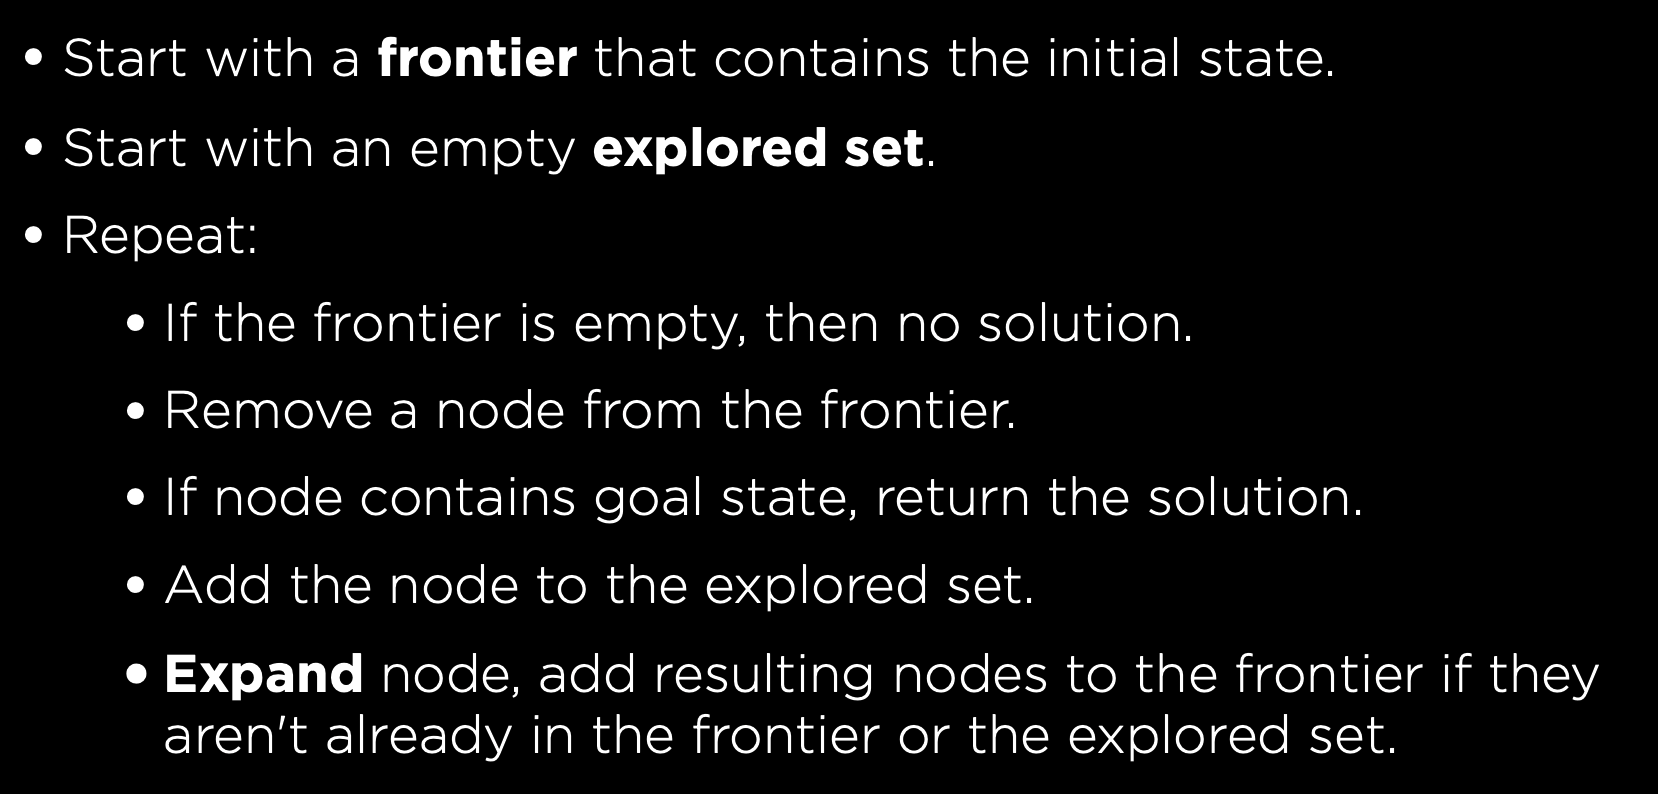

In [32]:
def bfs_search(graph, start, goal):
    q = QueueFrontier()
    start_node = Node(start, None, None)
    q.add(start_node)
    explored = set()

    while not q.empty():
        node = q.remove()

        if node.state == goal:
            actions = []
            nodes = []
            while node.parent is not None:
                actions.append({"weight": graph[node.state][node.parent.state]["weight"]})
                nodes.append(node.state)
                node = node.parent
            actions.reverse()
            nodes.reverse()
            return actions, nodes

        explored.add(node.state)

        for neighbor in graph.neighbors(node.state):
            if neighbor not in explored and not q.contains_state(neighbor):
                child = Node(neighbor, node, None)
                q.add(child)

    return None
    
    
    #your code 

In [34]:
def dfs_search(graph, start, goal):
    s = StackFrontier()
    start_node = Node(start, None, None)
    s.add(start_node)
    explored = set()

    while not s.empty():
        node = s.remove()

        if node.state == goal:
            actions = []
            nodes = []
            while node.parent is not None:
                actions.append({"weight": graph[node.state][node.parent.state]["weight"]})
                nodes.append(node.state)
                node = node.parent
            actions.reverse()
            nodes.reverse()
            return actions, nodes

        explored.add(node.state)

        for neighbor in graph.neighbors(node.state):
            if neighbor not in explored and not s.contains_state(neighbor):
                child = Node(neighbor, node, None)
                s.add(child)

    return None
    
    #your code


In [35]:
# Perform a BFS search from Arad to Bucharest
actions, nodes = bfs_search(G, 'Arad', 'Bucharest')
print('BFS path from Arad to Bucharest:')
print(actions)
print(nodes)

# Perform a DFS search from Arad to Bucharest
actions, nodes = dfs_search(G, 'Arad', 'Bucharest')
print('DFS path from Arad to Bucharest:')
print(actions)
print(nodes)

BFS path from Arad to Bucharest:
[{'weight': 140}, {'weight': 99}, {'weight': 211}]
['Sibiu', 'Fagaras', 'Bucharest']
DFS path from Arad to Bucharest:
[{'weight': 118}, {'weight': 111}, {'weight': 70}, {'weight': 75}, {'weight': 120}, {'weight': 138}, {'weight': 101}]
['Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest']


### Sample output

BFS path from Arad to Bucharest:

[{'weight': 140}, {'weight': 99}, {'weight': 211}]

['Sibiu', 'Fagaras', 'Bucharest']

DFS path from Arad to Bucharest:

[{'weight': 118}, {'weight': 111}, {'weight': 70}, {'weight': 75}, {'weight': 120}, {'weight': 138}, {'weight': 101}]

['Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest']